In [1]:
from TSIClient import TSIClient as tsi
import pandas as pd

In [2]:
client = tsi.TSIClient(
            environment="tsi-campus-env",
            client_id="67e36cb2-50ec-4608-aa17-1f81befda969",
            client_secret="-X3d06xpAd5WOMA0~p-l-iWW_z22-V6MXr",
            applicationName="MAIDAP_Energy",
            tenant_id="72f988bf-86f1-41af-91ab-2d7cd011db47",
)

In [3]:
client.types.getTypeTsx('FahrenheitToCelsius')

{'1be09af9-f089-4d6b-9f0b-48018b5f7393': "($event['PresentValue'].Double-32) * 5/9",
 'dtmi:com:example:TemperatureController;1': 'coalesce($event.workingSet.Long, toLong($event.workingSet.Double))'}

In [4]:
data = client.query.getDataById(
...     timeseries=["Device_1210101_AV_89"],
        variable_name='FahrenheitToCelsius',
...     timespan=["2020-05-06T00:00:00.00Z", "2020-06-06T00:00:00.00Z"],
...     interval="PT5M",
...     useWarmStore=False
... )

CRITICAL:root:Loaded data for tag: Device_1210101_AV_89


In [5]:
print(data)

                     timestamp  Device_1210101_AV_89
2901 2020-05-06 00:00:12+00:00             12.199351
2902 2020-05-06 00:06:32+00:00             20.910119
2870 2020-05-06 00:12:38+00:00             16.949747
2903 2020-05-06 00:18:23+00:00             20.660765
2904 2020-05-06 00:24:01+00:00             18.040835
...                        ...                   ...
6502 2020-06-05 23:30:26+00:00             17.940776
6503 2020-06-05 23:36:25+00:00             15.754598
6512 2020-06-05 23:42:23+00:00             17.619731
6504 2020-06-05 23:48:14+00:00             17.730200
6513 2020-06-05 23:54:05+00:00             10.632432

[7406 rows x 2 columns]


In [6]:
data1 = client.query.getDataById(
...     timeseries=["Device_1210101_AV_101"],
        variable_name='FahrenheitToCelsius',
...     timespan=["2020-05-06T00:00:00.00Z", "2020-06-06T00:00:00.00Z"],
...     interval="PT5M",
...     useWarmStore=False
... )

CRITICAL:root:Loaded data for tag: Device_1210101_AV_101


In [7]:
print(data1)

                     timestamp  Device_1210101_AV_101
3979 2020-05-06 00:00:12+00:00              25.833333
3980 2020-05-06 00:06:32+00:00              25.833333
3947 2020-05-06 00:12:38+00:00              25.833333
3981 2020-05-06 00:18:23+00:00              25.833333
3948 2020-05-06 00:24:01+00:00              25.833333
...                        ...                    ...
3935 2020-06-05 23:30:26+00:00              24.722222
3936 2020-06-05 23:36:25+00:00              24.722222
3937 2020-06-05 23:42:23+00:00              24.722222
3938 2020-06-05 23:48:14+00:00              24.722222
3939 2020-06-05 23:54:05+00:00              24.722222

[7406 rows x 2 columns]


In [8]:
rst = data.merge(data1)

In [9]:
print(rst)

                     timestamp  Device_1210101_AV_89  Device_1210101_AV_101
0    2020-05-06 00:00:12+00:00             12.199351              25.833333
1    2020-05-06 00:06:32+00:00             20.910119              25.833333
2    2020-05-06 00:12:38+00:00             16.949747              25.833333
3    2020-05-06 00:18:23+00:00             20.660765              25.833333
4    2020-05-06 00:24:01+00:00             18.040835              25.833333
...                        ...                   ...                    ...
7396 2020-06-05 23:30:26+00:00             17.940776              24.722222
7397 2020-06-05 23:36:25+00:00             15.754598              24.722222
7398 2020-06-05 23:42:23+00:00             17.619731              24.722222
7399 2020-06-05 23:48:14+00:00             17.730200              24.722222
7400 2020-06-05 23:54:05+00:00             10.632432              24.722222

[7401 rows x 3 columns]


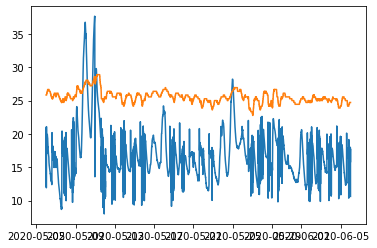

In [10]:
import matplotlib.pyplot as plt

x = rst['timestamp']
y1 = rst['Device_1210101_AV_89']
y2 = rst['Device_1210101_AV_101']

plt.plot(x, y1)

plt.plot(x, y2)

plt.show()